In [30]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import pv_model_210131 as pv
# k = boltzmann's constnat = 1.3806503 * 10 ** (-23) J/K
# Temperature = 25
# Isc = 8.21 A
# Voc = 32.9 V
# Pmax_e = 200.143 W (used to find Rp iteratively)
# Kv = -0.123 V/K (in improved I0 equation)
# Ki = 0.0032 A/K (in improved I0 equation)
# Ns = 54 (used in Vt equation)

Ipvn = 8.214
Tn = 25
T = 30
Gn = 2000
G = 1000
k = 1.3806503 * math.pow(10, -23) # boltzmann constant
q = 1.602 * math.pow(10, -19) # charge on electron
Kv = -0.0032 * Vocn # voltage temperature coefficient
Ki = -0.0032 * Iscn # current temperature coefficient

Iscn = 8.21
Vocn = 32.9
Vtn = 54 * k * Tn / q
bandgap_energy = 1.11

In [36]:
# plots different voltage current pairs on an IV curve
def iv_curve(Vocn, Ipv, I0, Tn, a):
    v = np.arange(0, Vocn, 0.1)
    i = []
    a = 1
    for V in v:
        i.append(pv.current(Ipv, I0, V, Tn, a))
    figure = plt.figure(1)
    plt.plot(v, i)
    plt.show()

def pv_current(i_nominal, ki, temp_nominal, temp_actual, irradiation_nominal, irradiation_actual):
    delta_temp = temp_nominal - temp_actual
    i_current = (i_nominal + ki*delta_temp) * irradiation_actual / irradiation_nominal
    return i_current

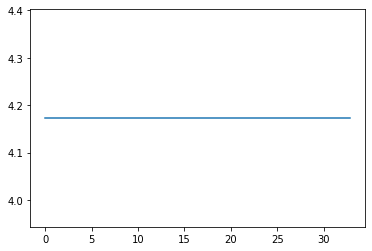

32.800000000000004 4.172680000000001
0.023965413115789924 8.100235789662293


In [37]:
Ipv = pv_current(Ipvn, Ki, Tn, T, Gn, G)
I0 = pv.saturation_current(Iscn, Vocn, Vtn, 1.3, Tn, T, bandgap_energy)
a = 1
fig = iv_curve(Vocn, Ipv, I0, Tn, a)
plt.show()

v = np.arange(0, Vocn, 0.1)
max_p = 0
for i in range(len(v)):
    V = v[i]
    I = pv.current(Ipv, I0, V, Tn, a)
    p = v[i]*I
    if p > max_p:
        Vmp = v[i]
        Imp = I
        max_p = p
print(Vmp, Imp)

Rs_max = (Vocn - Vmp) / Imp
Rp_min = Vmp / (Iscn - Imp) - Rs_max
print(Rs_max, Rp_min)

## To Do next:
clean up (add descriptive comments including definitions for variables, etc)

find real values to test code with

change current() to not be only ideal

calculate power

create PV curve